# Lectuctura y manejo de informacion Salida Coquimbo Final

El proposito del siguiente trabajo es recaudar toda la informacion posible respecto al arhcio csv el cual contiene un dataframe, para posteriormente tratar la informacion y realizar preguntas.

In [51]:
# Importamos librerias necesarias
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt

# Especifica los tipos de datos para las columnas problemáticas
dtype={'ciudad': 'object', 'short_link': 'object'}

# Lee el archivo CSV con los tipos de datos especificados almacenando en df un DataFrame de dask
df = dd.read_csv('salida_final_coquimbo.csv', dtype=dtype, encoding='utf-8')

# Que comunas seran investigadas?

In [52]:
# Filtramos los dato para mostrar lo mas limpeo posible
comunas = df.loc[df['comuna'] != 'No disponible', 'comuna'].drop_duplicates().compute()

# Muestra los valores únicos resultantes
print(comunas,"\n\n")
    

0           Los Vilos
1            Coquimbo
2              Vicuña
3          La Higuera
5              Ovalle
6        Monte Patria
7            Paihuano
17          La Serena
32             Canela
42          Salamanca
48          Andacollo
59        Rio Hurtado
82            Illapel
129        Combarbala
777         Punitaqui
1641      Río Hurtado
1772       Combarbalá
4790         La Ligua
66028     La Estrella
Name: comuna, dtype: string 





### Variacion de codigo en caso de querer usar pandas
    Se puede implementar esto mismo usando Pandas, para esto, hay que obtener Dask DataFrame y luego trasformarlo para
    que panda pueda utilizarlo, para esto se utiliza ".compute()" ya que dask utiliza la programacion diferida.
    
<pre>
<code>
```
#Dataframe de dask
comunas = df.loc[df['comuna'] != 'No disponible', 'comuna']

#Usamos compute para que pandas pueda utilizarlo
comunas_pandas = comunas.compute()

#Ahora excluimos los valores duplicados con ".drop_duplicates"
comunas_pandas = comunas_pandas.drop_duplicates(keep=False)
print(comunas_pandas)
```
</code>
</pre>


## De donde se sacan la mayoria de la informacion?


Total de datos
82632

Conteo de plataformas

fuente
Airbnb       51799
Booking      16165
Parairnos    11188
Sernatur      1854
Google        1626
Name: count, dtype: int64[pyarrow] 




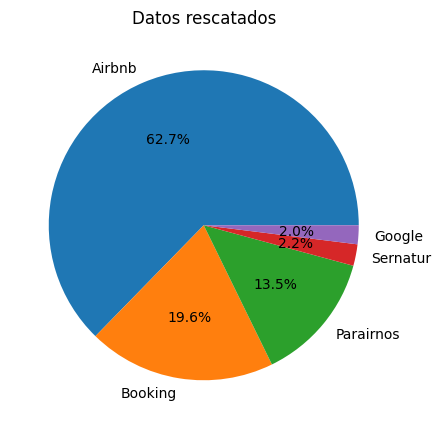

In [53]:
# Cuentas las veces que se repiten las palabras en 'fuente' regresando un indice con valores unicos,luego ejecutamos la tarea con compute.
conteo_fuente = df['fuente'].value_counts().compute()

# Veremos el total de los datos segun las filas usando compute para ver el valor real.
total_dato = len(df.compute())

print("\nTotal de datos")
print(total_dato)

print('\nConteo de plataformas\n')
print(conteo_fuente, "\n\n")

# Crear un gráfico de pastel
plt.figure(figsize=(5, 8))
plt.pie(conteo_fuente, labels=conteo_fuente.index, autopct='%1.1f%%')
plt.title('Datos rescatados')
plt.show()

#### Resultados

La finalidad de este grafico es poder visualizar en que plataforma se encuentra la mayoria de informacion, dandonos a conocer que se encuentran 51799 datos en Airbnb con un 62.7% del total.

## Cuales son las categorias mas frecuentes?

Para poder dar respuesta a esta pregunta se utilizara la columna "Categoria" con la finalidad de aislar los datos.

In [54]:
# 
cont_categoria = df['categoria'].value_counts().compute()

print("Recuento\n")
print(cont_categoria,"\n\n")

Recuento

categoria
Alojamientos                                79724
Alimentacion                                 1626
Restaurantes Y Similares                      456
Turismo Aventura                              263
Guías De Turismo                              194
Transporte De Pasajeros Vía Terrestre         102
Tour Operador                                  63
Agencia De Viajes                              61
Servicios De Producción Artesanal              44
Servicios De Esparcimiento                     36
Servicios Culturales                           28
Arriendo De Vehículos                          12
Servicios Deportivos                           12
Transporte De Pasajeros Por Vía Marítima        6
Servicios De Souvenir                           4
Transporte De Pasajeros Por Vía Aérea           1
Name: count, dtype: int64[pyarrow] 





Podemos ver que las categorias mas frecuentes son los Alojamientos y Alimentos seguido de Restaurantes y similares.

Si queremos saber la informacion especifica de alguna de las categorias tendremos que hacer lo siguiente: 

In [55]:
# Variable para poder rescatar la informacion de la fila
informacion = df.loc[df['categoria'] == 'Transporte De Pasajeros Por Vía Aérea'].compute()
print(informacion,"\n")

            id               titulo  pasajeros  habitaciones  precio  \
695  1004641-6  Aeroservicios Toqui        NaN           NaN     NaN   

     calificacion_general Fecha_extraccion    fuente              tipo  \
695                   NaN       2011-02-21  Sernatur  Transporte Aéreo   

                                 categoria  ...    latitud  longitud  \
695  Transporte De Pasajeros Por Vía Aérea  ... -29.918371  -71.2031   

     localidad     comuna ciudad              region           provincia  \
695  La Serena  La Serena   <NA>  Región de Coquimbo  Provincia de Elqui   

      pais              link short_link  
695  Chile  www.aerotoqui.cl       <NA>  

[1 rows x 21 columns] 



En este caso estamos mostrando la informacion de Transporte De Pasajeros Por Vía Aérea.

# Cuantas de las empresas de turismo tienen una pagina web?


In [56]:
# 
# Cuenta cuántas filas tienen un valor distinto de 'No disponible' en la columna 'link'
webs = (df['link'] != 'No disponible').sum().compute()
nowebs = (df['link'] == 'No disponible').sum().compute()
# Muestra el resultado
print("\nEmpresas de turismo sin paginas web: ", nowebs, "\nEmpresas de turismo con paginas web:",webs,"\n")


Empresas de turismo sin paginas web:  2330 
Empresas de turismo con paginas web: 80302 



# Cuales son las provincias que se encuentran disponibles para la investigacion?


In [57]:
# Provincias disponibles
Provincias = df['provincia'].value_counts().compute()
print('\nProvincias a investigar\n')
print(Provincias,'\n')

# Contamos todas las columnas que estan vacias gracias a la funcion isna().
valores_nulos = (df['provincia']).isna().sum().compute()
print('Valores en blanco: ',valores_nulos)
# Se puede ver un error en la informacion ya que no existe Provincia de vicuna y provincia de tongoy, ademas de las NA.

#


Provincias a investigar

provincia
Provincia de Elqui     67610
Provincia de Choapa     6711
Provincia de Limarí     2224
Provincia de Vicuña      171
Provincia de Tongoy       18
Name: count, dtype: int64[pyarrow] 

Valores en blanco:  5898


Podemos destacar de la informacion recopilada es que trabajaremos con Provincia de Choapa,Elqui,Limari. Ademas se puede ver que tambien hay datos en blancos y tambien Provincias erroneas, tales como Provincia de Vicuña y Provincia de Tongoy.


# Conteo de empresas turisticas presente en cada Provincia


## Provincia de Limari

In [58]:
# Se crea una variable para almacenar el dask DataFrame ya extraido de memoria sumado con lo buscado.

Prov_limari = (df['provincia'] == 'Provincia de Limarí').sum().compute()
print('\nTotal de empresas de turismo en la Provincia de Limari:',Prov_limari,'\n\n')

numero_categorias_limari = df.loc[df['provincia'] == 'Provincia de Limarí', 'categoria'].nunique().compute()
print('Existe un total de',numero_categorias_limari,'categorias de turismos en el provincia del Limari\n\n')

# Se crea una variable para almacenar los valores que coincidan con Provincia de Limari y que se encuentren en la columna de categoria.

Prov_limari_avanzado = df.loc[df['provincia'] == 'Provincia de Limarí','categoria'].value_counts().compute()
print('Las cuales estan distribuidas en las siguientes categorias: \n\n',Prov_limari_avanzado,'\n\n')


Total de empresas de turismo en la Provincia de Limari: 2224 


Existe un total de 13 categorias de turismos en el provincia del Limari


Las cuales estan distribuidas en las siguientes categorias: 

 categoria
Alojamientos                             1927
Alimentacion                              154
Restaurantes Y Similares                   74
Guías De Turismo                           23
Transporte De Pasajeros Vía Terrestre       9
Servicios De Producción Artesanal           8
Agencia De Viajes                           7
Servicios Culturales                        7
Tour Operador                               6
Servicios De Esparcimiento                  3
Turismo Aventura                            3
Servicios Deportivos                        2
Arriendo De Vehículos                       1
Name: count, dtype: int64[pyarrow] 




## Provincia del Choapa

In [59]:
# Se crea una variable para almacenar el dask DataFrame ya extraido de memoria sumado con lo buscado.

Prov_choapa = (df['provincia'] == 'Provincia de Choapa').sum().compute()
print('\nTotal de empresas de turismo en la Provincia de Choapa: ', Prov_choapa,'\n\n')

numero_categorias_choapa = df.loc[df['provincia'] == 'Provincia de Choapa', 'categoria'].nunique().compute()
print('Existe un total de',numero_categorias_choapa,'categorias de turismos en el provincia del Choapa\n\n')

# Se crea una variable para almacenar los valores que coincidan con Provincia de Choapa y que se encuentren en la columna de categoria.

Prov_choapa_avanzado = df.loc[df['provincia'] == 'Provincia de Choapa','categoria'].value_counts().compute()
print('Las cuales estan distribuidas en las siguientes categorias: \n\n',Prov_choapa_avanzado,'\n\n')



Total de empresas de turismo en la Provincia de Choapa:  6711 


Existe un total de 13 categorias de turismos en el provincia del Choapa


Las cuales estan distribuidas en las siguientes categorias: 

 categoria
Alojamientos                             6399
Alimentacion                              171
Restaurantes Y Similares                   81
Guías De Turismo                           19
Turismo Aventura                           18
Servicios De Producción Artesanal           6
Agencia De Viajes                           4
Transporte De Pasajeros Vía Terrestre       4
Tour Operador                               3
Servicios De Esparcimiento                  2
Servicios Deportivos                        2
Arriendo De Vehículos                       1
Servicios De Souvenir                       1
Name: count, dtype: int64[pyarrow] 




## Provincia del Elqui

In [60]:
#Se crea una variable para almacenar el dask DataFrame ya extraido de memoria sumado con lo buscado.

Prov_elqui = (df['provincia'] == 'Provincia de Elqui').sum().compute()
print('Empresas de turismo en la Provincia de Elqui:', Prov_elqui,'\n\n')
#Se crea una variable para almacenar los valores que coincidan con Provincia de Elqui y que se encuentren en la columna de categoria.

# Contamos los elementos únicos en categoria

numero_categorias_elqui = df.loc[df['provincia'] == 'Provincia de Elqui', 'categoria'].nunique().compute()
print('Existe un total de',numero_categorias_elqui,'categorias de turismos en el provincia del elqui\n\n')

# Se crea una variable para almacenar los valores que coincidan con Provincia de Elqui y que se encuentren en la columna de categoria.
Prov_elqui_avanzado = df.loc[df['provincia'] == 'Provincia de Elqui','categoria'].value_counts().compute()
print('Las cuales estan distribuidas en las siguientes forma: \n\n',Prov_elqui_avanzado,'\n\n')



Empresas de turismo en la Provincia de Elqui: 67610 


Existe un total de 16 categorias de turismos en el provincia del elqui


Las cuales estan distribuidas en las siguientes forma: 

 categoria
Alojamientos                                65311
Alimentacion                                 1301
Restaurantes Y Similares                      301
Turismo Aventura                              242
Guías De Turismo                              152
Transporte De Pasajeros Vía Terrestre          89
Tour Operador                                  54
Agencia De Viajes                              50
Servicios De Esparcimiento                     31
Servicios De Producción Artesanal              30
Servicios Culturales                           21
Arriendo De Vehículos                          10
Servicios Deportivos                            8
Transporte De Pasajeros Por Vía Marítima        6
Servicios De Souvenir                           3
Transporte De Pasajeros Por Vía Aérea           1
Name

Se puede concluir con la informacion rescatada que la categoria dominante entre las empresas de turismo es la de Alojamiento. Ahora, la provincia del Elqui tiene la mayor cantidad de empresas de turismos, con un total de **67610** empresas. Siendo el Alojamiento unos de las dominantes si es que lo filtramos en las categorias. Ademas se puede ver que la provincia del elqui es la unica que tiene Transporte De Pasajeros Por Vía Aérea. Tambien que la provincia del elqui tiene una mayor cantidad de categorias de turismo.